In [1]:
!pip install -q osmnx
!pip install -q pandana
!pip install -q h3
!pip install -q pydeck

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 37.0 MB/s eta 0:00:00


In [9]:
import geopandas as gpd
import pandas as pd
import osmnx as ox
import shapely
import pandana as pdna
import h3
import pydeck as pdk
from urllib.request import urlopen
import json
import matplotlib.colors as mp_color
import matplotlib.cm as cmx

In [11]:
json_url = '[[[3.2396181999,6.3928915345],[3.4483584343,6.3928915345],[3.4483584343,6.6607666153],[3.2396181999,6.6607666153],[3.2396181999,6.3928915345]]]'

# Load the JSON data directly from the string
bboxs = json.loads(json_url)

# Access the coordinates - assuming you want the first set of coordinates
coords = bboxs[0][0]  # Access the first element of the first list

# Unpack coordinates
W, S = coords

# Assuming you want to create a bounding box, you'll need to define E and N
# based on your needs. Here's an example of creating a small bounding box:
E = W + 0.1
N = S + 0.1

bbox = shapely.box(W, S, E, N)

In [12]:
osm_network = ox.graph.graph_from_polygon(
    bbox,
    network_type='all',
    simplify=True,
    retain_all=False,
    truncate_by_edge=False,
    clean_periphery=None,
    custom_filter=None
)

In [13]:
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Polygon

# Define your boundary coordinates (GeoJSON format)
boundary_coords = [[(3.2396181999,6.3928915345),(3.4483584343,6.3928915345),
                    (3.4483584343,6.6607666153),(3.2396181999,6.6607666153),
                    (3.2396181999,6.3928915345)]]

# Create a Polygon from the boundary coordinates
polygon = Polygon(boundary_coords[0])

# Convert boundary into GeoDataFrame
boundary_gdf = gpd.GeoDataFrame(geometry=[polygon], crs="EPSG:4326")

# Get metro stations within the boundary
tags = {'railway': 'station', 'station': 'subway'}
metro_stations = ox.geometries_from_polygon(boundary_gdf.unary_union, tags)

print(metro_stations)

<ipython-input-13-4215ae5449a6>:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  metro_stations = ox.geometries_from_polygon(boundary_gdf.unary_union, tags)


                                                 name public_transport  \
element_type osmid                                                       
node         10776098576                       Marina          station   
             10777382244                       Iganmu          station   
             10777382245                       Mile 2          station   
             10777382246                        Alaba          station   
             10777382247             National Theatre          station   
way          981038963    Asiwaju Bola Tinubu Station          station   
             1157159790            Agege LRMT Station          station   

                          railway station  \
element_type osmid                          
node         10776098576  station  subway   
             10777382244  station  subway   
             10777382245  station  subway   
             10777382246  station  subway   
             10777382247  station  subway   
way          98103

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
# Define boundary coordinates (GeoJSON format)
boundary_coords = [[(3.2615908142,6.4038094301), (3.4758242546,6.4038094301),
                    (3.4758242546,6.6539464489), (3.2615908142,6.6539464489),
                    (3.2615908142,6.4038094301)]]

# Create a Polygon from the boundary coordinates
boundary_polygon = Polygon(boundary_coords[0])

# Convert boundary into a GeoDataFrame
boundary_gdf = gpd.GeoDataFrame(geometry=[boundary_polygon], crs="EPSG:4326")

# Define tags for metro stations and their building footprints
tags = {'building': 'train_station'}

# Download metro station footprints within the boundary
metro_buildings = ox.geometries_from_polygon(boundary_gdf.unary_union, tags)

# Assign a default height of 30 for visualization purposes
metro_buildings['height'] = 30

print(metro_buildings)

<ipython-input-6-c48e7620802c>:16: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  metro_buildings = ox.geometries_from_polygon(boundary_gdf.unary_union, tags)


                                                                     nodes  \
element_type osmid                                                           
way          662451287   [6201769124, 6201769125, 6201769126, 620176912...   
             1157080488  [10760220056, 10760220057, 10760220058, 107602...   
             1157269475  [10762027205, 10762027206, 10762027207, 107620...   

                              building  \
element_type osmid                       
way          662451287   train_station   
             1157080488  train_station   
             1157269475  train_station   

                                                                  geometry  \
element_type osmid                                                           
way          662451287   POLYGON ((3.36782 6.47463, 3.36957 6.47421, 3....   
             1157080488  POLYGON ((3.38101 6.48332, 3.38135 6.48346, 3....   
             1157269475  POLYGON ((3.33811 6.59079, 3.33835 6.59089, 3....   

       

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [14]:
# Define boundary coordinates (GeoJSON format)
boundary_coords = [[(3.2615908142,6.4038094301), (3.4758242546,6.4038094301),
                    (3.4758242546,6.6539464489), (3.2615908142,6.6539464489),
                    (3.2615908142,6.4038094301)]]

# Create a Polygon from the boundary coordinates
boundary_polygon = Polygon(boundary_coords[0])

# Convert boundary into a GeoDataFrame
boundary_gdf = gpd.GeoDataFrame(geometry=[boundary_polygon], crs="EPSG:4326")

# Define tags for metro stations and their building footprints
tags = {'building': 'train_station'}

# Download metro station footprints within the boundary
metro_buildings = ox.geometries_from_polygon(boundary_gdf.unary_union, tags)

# Assign a default height of 10 for visualization purposes
metro_buildings['height'] = 30

print(metro_buildings)

<ipython-input-14-3f7cd9d67400>:16: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  metro_buildings = ox.geometries_from_polygon(boundary_gdf.unary_union, tags)


                                                                     nodes  \
element_type osmid                                                           
way          662451287   [6201769124, 6201769125, 6201769126, 620176912...   
             1157080488  [10760220056, 10760220057, 10760220058, 107602...   
             1157269475  [10762027205, 10762027206, 10762027207, 107620...   

                              building  \
element_type osmid                       
way          662451287   train_station   
             1157080488  train_station   
             1157269475  train_station   

                                                                  geometry  \
element_type osmid                                                           
way          662451287   POLYGON ((3.36782 6.47463, 3.36957 6.47421, 3....   
             1157080488  POLYGON ((3.38101 6.48332, 3.38135 6.48346, 3....   
             1157269475  POLYGON ((3.33811 6.59079, 3.33835 6.59089, 3....   

       

In [15]:

# Define your boundary coordinates (GeoJSON format)
boundary_coords = [[(3.2615908142,6.4038094301), (3.4758242546,6.4038094301),
                    (3.4758242546,6.6539464489), (3.2615908142,6.6539464489),
                    (3.2615908142,6.4038094301)]]

# Create a Polygon from the boundary coordinates
boundary_polygon = Polygon(boundary_coords[0])

# Convert boundary into GeoDataFrame
boundary_gdf = gpd.GeoDataFrame(geometry=[boundary_polygon], crs="EPSG:4326")

# Define tags to get metro lines (e.g., tram, subway, etc.)
tags = {'railway': 'subway'}

# Fetch metro lines within the boundary
metro_lines = ox.geometries_from_polygon(boundary_gdf.unary_union, tags)

# Filter for LineString geometries (routes)
metro_routes = metro_lines[metro_lines.geometry.type == 'LineString']

print(metro_routes)

<ipython-input-15-a7ce35d0adc0>:16: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  metro_lines = ox.geometries_from_polygon(boundary_gdf.unary_union, tags)


                                                                  geometry  \
element_type osmid                                                           
way          559496463   LINESTRING (3.37859 6.46671, 3.37849 6.46686, ...   
             662455003       LINESTRING (3.33909 6.47470, 3.33878 6.47448)   
             662455004   LINESTRING (3.33878 6.47448, 3.33845 6.47424, ...   
             671558235   LINESTRING (3.34562 6.47849, 3.34419 6.47806, ...   
             671558236   LINESTRING (3.39318 6.44732, 3.39224 6.44803, ...   
             1153508921  LINESTRING (3.39506 6.44623, 3.39435 6.44671, ...   
             1153508922  LINESTRING (3.39428 6.44676, 3.39412 6.44686, ...   
             1153508923  LINESTRING (3.39955 6.44299, 3.39648 6.44515, ...   
             1153508924      LINESTRING (3.39577 6.44557, 3.39498 6.44612)   
             1153508925  LINESTRING (3.39952 6.44295, 3.39644 6.44505, ...   
             1158760738      LINESTRING (3.39585 6.44568, 3.3950

In [16]:
# Define your boundary coordinates (GeoJSON format)
boundary_coords = [[(3.2615908142,6.4038094301), (3.4758242546,6.4038094301),
                    (3.4758242546,6.6539464489), (3.2615908142,6.6539464489),
                    (3.2615908142,6.4038094301)]]

# Create a Polygon from the boundary coordinates
boundary_polygon = Polygon(boundary_coords[0])

# Convert boundary into GeoDataFrame
boundary_gdf = gpd.GeoDataFrame(geometry=[boundary_polygon], crs="EPSG:4326")

# Download the street network for the defined boundary
osm_network = ox.graph_from_polygon(boundary_polygon, network_type='drive')

nodes, edges = ox.convert.graph_to_gdfs(osm_network, nodes=True, edges=True) #node_geometry=True, fill_edge_geometry=True
edges = edges.reset_index()

print(nodes)
print(edges)

                    y         x  street_count          highway  \
osmid                                                            
31670138     6.651482  3.296697             4              NaN   
31673602     6.556648  3.357372             3              NaN   
31673613     6.552824  3.359371             4              NaN   
31673663     6.586942  3.356040             3              NaN   
31673672     6.579237  3.360431             3  traffic_signals   
...               ...       ...           ...              ...   
12172115333  6.590033  3.277905             3              NaN   
12181338420  6.558885  3.266783             1              NaN   
12181378872  6.557223  3.266262             3              NaN   
12181378873  6.557289  3.266092             3              NaN   
12181378874  6.557665  3.266207             3              NaN   

                            geometry  
osmid                                 
31670138     POINT (3.29670 6.65148)  
31673602     POINT (3.35

In [17]:
import pandana as pdna # Import the pandana library and assign it to the alias 'pdna'

network = pdna.Network(nodes["x"], nodes["y"], edges["u"], edges["v"], edges[["length"]])

In [18]:
# Download street network within your boundary coordinates
import osmnx as ox
from shapely.geometry import Polygon

# Create a Polygon from the boundary coordinates
boundary_polygon = Polygon(boundary_coords[0])

# Download the street network within the boundary
osm_network = ox.graph_from_polygon(boundary_polygon, network_type='all')

In [19]:
# Set the Points of Interest (metro stations)
max_distance = 25000  # in meters
num_pois = 1
category = 'metro_stations'

# Import the Point object from shapely.geometry
from shapely.geometry import Point

# Create a GeoDataFrame with metro station data (replace with your actual data)
# Ensure it has a 'geometry' column with Point objects
station_nodes = gpd.GeoDataFrame({'name': ['Station A', 'Station B'],
                                 'geometry': [Point(3.2, 6.5), Point(3.4, 6.6)]},
                                crs="EPSG:4326")

# Ensure station_nodes contains geometries with x and y columns
station_nodes['x'] = station_nodes['geometry'].x
station_nodes['y'] = station_nodes['geometry'].y

# Set POIs and calculate nearest POIs
network.set_pois(category=category, maxdist=max_distance, maxitems=num_pois,
                 x_col=station_nodes['x'], y_col=station_nodes['y'])

# Calculate accessibility (distance to nearest metro station)
accessibility = network.nearest_pois(distance=max_distance, category=category, num_pois=num_pois)

# Output accessibility as a pandas DataFrame
print(accessibility)

                        1
osmid                    
31670138     16926.212891
31673602      8213.508789
31673613      8376.403320
31673663      7852.421875
31673672      6763.391113
...                   ...
12172115333  12873.906250
12181338420   8694.902344
12181378872   8352.082031
12181378873   8364.047852
12181378874   8404.399414

[32983 rows x 1 columns]


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


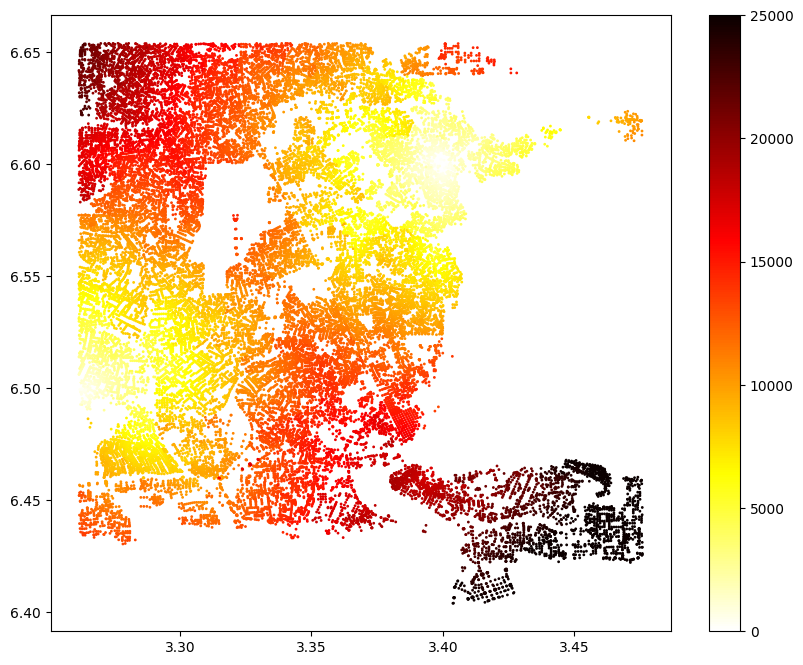

In [20]:
import matplotlib.pyplot as plt

# Define a function to plot accessibility
def plot_nearest_amenity(accessibility, n):
    fig, ax = network.plot(accessibility[n])
    ax.set_facecolor('k')  # Black background
    ax.set_title('Pedestrian accessibility to nearest Metro Stations (distance to POIs, in meters)', fontsize=14)
    return fig

# Plot and visualize the accessibility results
fig = plot_nearest_amenity(accessibility, num_pois)
plt.show()


In [21]:
APERTURE_SIZE = 9
hex_col = 'hex'+str(APERTURE_SIZE)

distance = nodes.join(accessibility)[['geometry', 1]].rename(columns={1:'distance_m'})
distance[hex_col] = distance.apply(lambda p: h3.geo_to_h3(p.geometry.y,p.geometry.x,APERTURE_SIZE),1)

distance_m = distance[[hex_col, 'distance_m']].groupby(hex_col).mean().reset_index()

In [29]:
distance_m['mins'] = distance_m['distance_m']/(30*16.6667)
distance_m['display_text'] = distance_m['mins'].apply(lambda x: f"Accessibility: {x:.0f} mins")

In [30]:
def create_custom_cmap(values):
    # Define the colors for the colormap
    colors = ['#42f5da', '#7DDA58', '#DECE58', '#DE8758', '#DE5858']

    # Create the colormap object
    cmap = mp_color.ListedColormap(colors)

    # Define the color boundaries for the colormap
    boundaries = values

    # Create the normalization object
    norm = mp_color.BoundaryNorm(boundaries, len(colors))

    return cmap, norm

def get_color_value(value, cmap, norm):
    # Normalize the value to the range of the colormap
    norm_value = norm(value)

    # Get the color value from the colormap
    color = cmap(norm_value)

    scaled_colors = list(map(lambda x: int(x*255), color[:3]))
    scaled_alpha = int(color[3]*100)

    scaled_colors += [scaled_alpha]
    return scaled_colors


def colormap_dataframe(df, value_col, cmap, norm, max_val=None):

    xdf = df.copy()
    xdf['color'] = xdf[f'{value_col}'].apply(lambda x: get_color_value(x, cmap, norm))
    xdf[['R', 'G', 'B', 'A']] = pd.DataFrame(xdf['color'].to_list())
    xdf = xdf.drop(['color'], axis=1)

    xdf[value_col] = xdf[value_col].round(1)

    return xdf

def create_h3_hex_layer(df):

    # Define a layer to display on a map
    layer = pdk.Layer(
        "H3HexagonLayer",
        df,
        pickable=True,
        stroked=True,
        filled=True,
        extruded=False,
        get_hexagon=hex_col,
        get_fill_color="[R, G, B, A]"
    )

    return layer

In [31]:
# Convert station_nodes to GeoJSON format
station_viz_json = station_nodes.to_json()

# Define the layers
station_layer = pdk.Layer(
    'GeoJsonLayer',
    data=station_viz_json,
    stroked=True,
    getLineColor=[158, 2, 38, 100],
    getLineWidth=10,
    filled=True,
    get_fill_color=[158, 2, 38, 100],
    extruded=True,
    get_elevation=30,
    pickable=True
)

route_layer = pdk.Layer(
    'PathLayer',
    data=metro_lines,
    pickable=True,
    get_color='color',
    width_scale=1,
    get_path="path",
    get_width=20
)

# Apply the colormap to the dataframe
cmap, norm = create_custom_cmap([0, 5, 10, 20, 40, distance_m['mins'].max()])
xdf = colormap_dataframe(df=distance_m, value_col='mins', cmap=cmap, norm=norm)

# Create a H3HexagonLayer
layer = create_h3_hex_layer(xdf)

# Set the viewport location
boundary_polygon = Polygon(boundary_coords[0])
boundary_gdf = gpd.GeoDataFrame(geometry=[boundary_polygon], crs="EPSG:4326")
boundary = boundary_gdf.total_bounds
x, y = boundary[0] + (boundary[2] - boundary[0]) / 2, boundary[1] + (boundary[3] - boundary[1]) / 2
view_state = pdk.ViewState(latitude=y, longitude=x, zoom=11, bearing=0, pitch=45)

tooltip = {
    "html": "{display_text}",
    "style": {
        "backgroundColor": "#4CAF50",
        "color": "#FFFFFF",
        "border": "2px solid #4CAF50",
        "borderRadius": "5px",
        "boxShadow": "2px 2px 10px rgba(0, 0, 0, 0.2)"
    }
}

# Render
r = pdk.Deck(layers=[station_layer, layer, route_layer], initial_view_state=view_state, tooltip=tooltip, description=legend_html)
r

Output hidden; open in https://colab.research.google.com to view.